# Computing persistence barcodes in practice
## Introduction
In this tutorial, we will explore how to use the [Gudhi](https://gudhi.inria.fr/) library to compute persistence barcodes from point cloud data. Gudhi is a powerful Python library for Topological Data Analysis (TDA), providing efficient implementations of various simplicial complexes and persistent homology algorithms. We will demonstrate how to construct Vietoris-Rips and Alpha complexes from a simple point cloud, and how to extract and interpret their persistence barcodes, which capture the topological features of the data across multiple scales.

# Installation

In [1]:
pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [gudhi]32m1/2 [gudhi]
Note: you may need to restart the kernel to use updated packages.


## An example of point cloud

In [8]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.2 MB/s eta 0:00:0000:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Generate 100 random points in the unit square
random_points = np.random.uniform(0, 1, size=(100, 2))

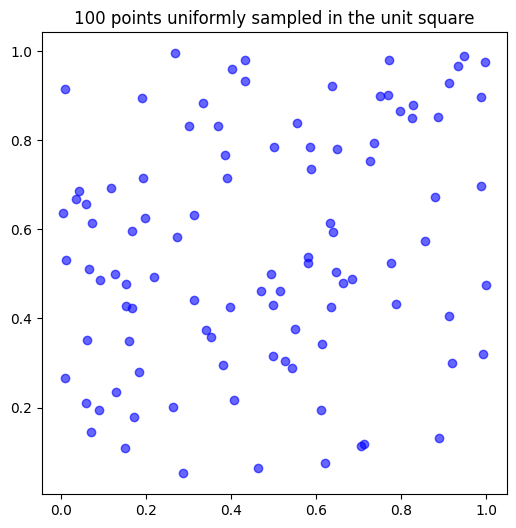

In [ ]:
import matplotlib.pyplot as plt

# Plot the point cloud
plt.figure(figsize=(6, 6))
plt.scatter(random_points[:, 0], random_points[:, 1], c='blue', alpha=0.6)
plt.title("100 points uniformly sampled in the unit square")
plt.show()

## Vietoris-Rips filtration

### Small example

In [ ]:
import numpy as np

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

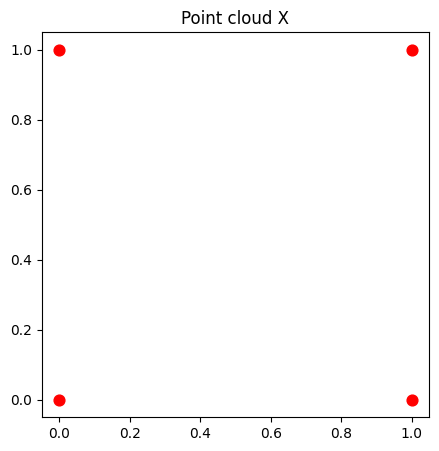

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c='red', s=60)
plt.title("Point cloud X")
plt.show()

In [ ]:
import gudhi as gd

In [4]:
# Vietoris-Rips Complex Example
# Construct a Vietoris-Rips complex from the point cloud X
rips_complex = gd.RipsComplex(points=X, max_edge_length=2.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

print("Vietoris-Rips Complex:")
for simplex in simplex_tree.get_simplices():
    print(simplex)

# Alpha Complex Example
# Construct an Alpha complex from the same point cloud X
alpha_complex = gd.AlphaComplex(points=X)
alpha_simplex_tree = alpha_complex.create_simplex_tree()

print("\nAlpha Complex:")
for simplex in alpha_simplex_tree.get_simplices():
    print(simplex)

Vietoris-Rips Complex:
([0, 1, 2], 1.4142135623730951)
([0, 1, 3], 1.4142135623730951)
([0, 1], 1.0)
([0, 2, 3], 1.4142135623730951)
([0, 2], 1.0)
([0, 3], 1.4142135623730951)
([0], 0.0)
([1, 2, 3], 1.4142135623730951)
([1, 2], 1.4142135623730951)
([1, 3], 1.0)
([1], 0.0)
([2, 3], 1.0)
([2], 0.0)
([3], 0.0)

Alpha Complex:
([0, 1, 2], 0.5)
([0, 1], 0.25)
([0, 2], 0.25)
([0], 0.0)
([1, 2, 3], 0.5)
([1, 2], 0.5)
([1, 3], 0.25)
([1], 0.0)
([2, 3], 0.25)
([2], 0.0)
([3], 0.0)


### Challenge
1. Compute the Vietoris-Rips filtration of 1000 points uniformly sampled on the unit square of $\R^2$.
2. Compute the persistence barcodes of this filtration and plot it as a persistence diagram.
3. Interpret what you see.

### Challenge
1. Compute the Vietoris-Rips filtration of uniformly sampled on the unit circle of $\R^2$.
2. Compute the persistence diagram of this filtration.
3. Add noise to it, and interpret what you see.

## Challenge 1